In [57]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [58]:
data_all = "Output/2019_2020_mixed_beverage"


df_all = pd.read_csv(data_all, encoding="utf-8")


In [59]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
df_all.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
0,32068897456,"HC&K, LLC",7035 W GRAND PKWY S STE 10,RICHMOND,TX,77407.0,79,1,TOP SUSHI,7035 W GRAND PKWY S STE 10,...,2019-01-16T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1
1,32051593963,J & J ACKERMAN CORP.,PO BOX 939,GRANGER,TX,76530.0,246,3,COTTON COUNTRY CLUB,212 E DAVILLA ST,...,2019-01-28T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1
2,32046106475,FJ RESTAURANT INC,9300 S INTERSTATE 35 STE 8500 # 431,AUSTIN,TX,78748.0,227,2,TAQUERIA MEXICANO GRILLE,10207 CHINA SPRING RD STE 140,...,2019-06-19T00:00:00.000,2019-01-31T00:00:00.000,10013,0,8648,0,18661,NaN,2019,1
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1


In [60]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   taxpayer_number                      120000 non-null  int64  
 1   taxpayer_name                        120000 non-null  object 
 2   taxpayer_address                     120000 non-null  object 
 3   taxpayer_city                        120000 non-null  object 
 4   taxpayer_state                       119912 non-null  object 
 5   taxpayer_zip                         119912 non-null  float64
 6   taxpayer_county                      120000 non-null  int64  
 7   location_number                      120000 non-null  int64  
 8   location_name                        120000 non-null  object 
 9   location_address                     120000 non-null  object 
 10  location_city                        120000 non-null  object 
 11  location_stat

In [61]:
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities.location_city

3             HOUSTON
4             HOUSTON
5              DALLAS
10             AUSTIN
12            HOUSTON
             ...     
119989        HOUSTON
119990    SAN ANTONIO
119994        HOUSTON
119996    SAN ANTONIO
119998        HOUSTON
Name: location_city, Length: 44006, dtype: object

In [62]:
new_df = dfcities[['location_city' , 'total_receipts']]
new_df.head()

,location_city,total_receipts
3,HOUSTON,5721
4,HOUSTON,0
5,DALLAS,0
10,AUSTIN,24068
12,HOUSTON,40336


In [63]:
new_df.groupby("location_city").size()

location_city
AUSTIN          7891
DALLAS          9582
FORT WORTH      4120
HOUSTON        14723
SAN ANTONIO     7690
dtype: int64

In [64]:
# not important to anyone else but we are meaning the reciepts
new_df.groupby("location_city").mean()

,total_receipts
location_city,
AUSTIN,51995.098720
DALLAS,46575.526299
FORT WORTH,36564.576214
HOUSTON,39860.013720
SAN ANTONIO,40220.662419


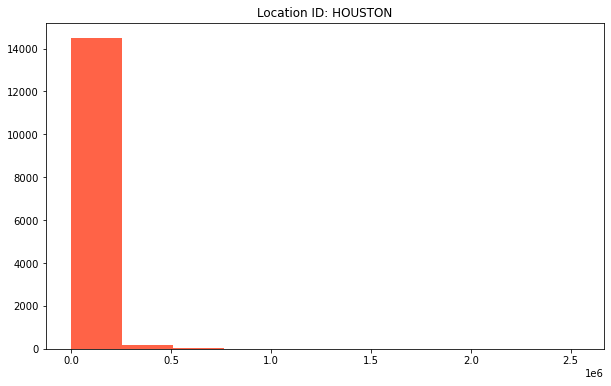

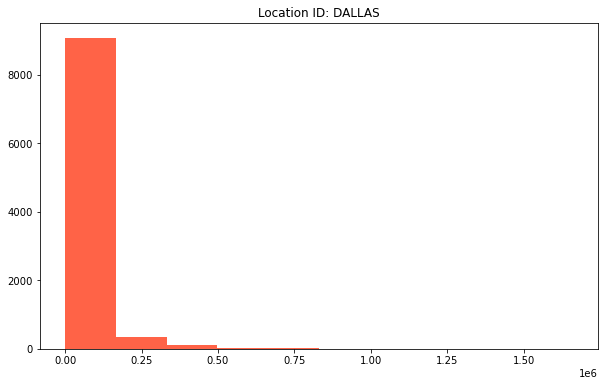

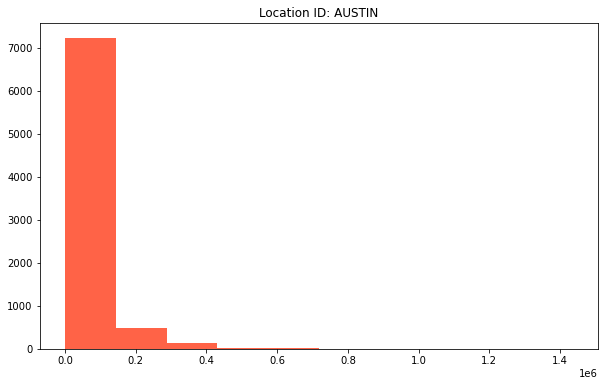

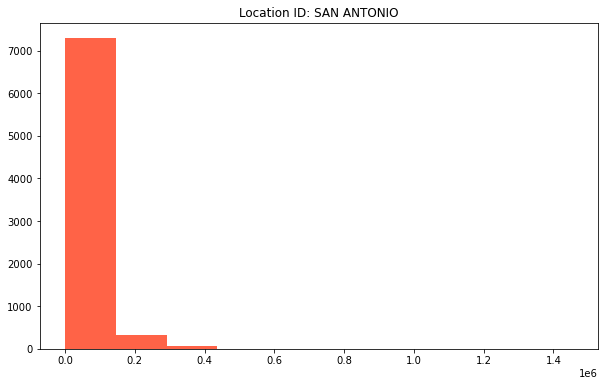

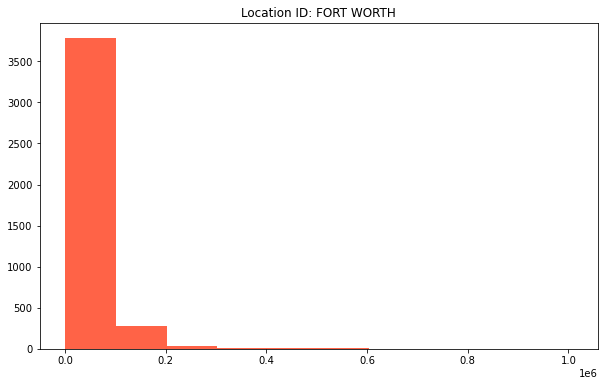

In [69]:
City_location = new_df.location_city.unique()

for location_city in locations:
    plt.figure(figsize=(10,6) , )
    c1 = ['tomato']
    data = new_df.loc[new_df.location_city == location_city]
    
    plt.hist(data.total_receipts, color = c1 )
    plt.title(f"Location ID: {location_city}")
    plt.show()

In [46]:
population1 = new_df[new_df["location_city"] == "HOUSTON"]
population1.total_receipts.mean()

39860.013720029885

In [47]:
population2 = new_df[new_df["location_city"] == "DALLAS"]
population2.total_receipts.mean()

46575.52629931121

In [11]:
stats.ttest_ind(population1.total_receipts, population2.total_receipts, equal_var=False)

Ttest_indResult(statistic=-6.323955524500319, pvalue=2.6087290237243133e-10)